In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def last_digits(nr):
    def fun(s):
        try:
            return int(str(s)[-nr:])
        except:
            return None
    return fun

def first_digits(nr):
    def fun(s):
        try:
            return int(str(s)[:nr]) if len(str(s)) >= nr else 0
        except:
            return None
    return fun

df = pd.read_csv("https://wybory.gov.pl/prezydent20200628/data/2/csv/wyniki_gl_na_kand_po_obwodach_csv.zip", sep=";", compression='zip')
print(df.columns)

Index(['Symbol kontrolny', 'Nr OKW', 'Kod TERYT', 'Typ gminy', 'Numer obwodu',
       'Typ obszaru', 'Typ obwodu', 'Siedziba', 'Gmina', 'Powiat',
       'Województwo', 'Komisje obwodowe otrzymały kart do głosowania',
       'Liczba wyborców uprawnionych do głosowania',
       'Nie wykorzystano kart do głosowania',
       'Liczba wyborców, którym wydano karty do głosowania',
       'Liczba wyborców głosujących przez pełnomocnika',
       'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania',
       'Liczba wyborców, którym wysłano pakiety wyborcze',
       'Liczba otrzymanych kopert zwrotnych',
       'Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
       'Liczba kopert zwrotnych, w których oświadczenie nie było podpisane',
       'Liczba kopert zwrotnych, w których nie było koperty na kartę do głosowania',
       'Liczba kopert zwrotnych, w których znajdowała się niezaklejona koperta na kartę do głosowania',
     

In [3]:
for c in ['Komisje obwodowe otrzymały kart do głosowania',
       'Liczba wyborców uprawnionych do głosowania',
       'Nie wykorzystano kart do głosowania',
       'Liczba wyborców, którym wydano karty do głosowania',
       'Liczba wyborców głosujących przez pełnomocnika',
       'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania',
       'Liczba wyborców, którym wysłano pakiety wyborcze',
       'Liczba otrzymanych kopert zwrotnych',
       'Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
       'Liczba kopert zwrotnych, w których oświadczenie nie było podpisane',
       'Liczba kopert zwrotnych, w których nie było koperty na kartę do głosowania',
       'Liczba kopert zwrotnych, w których znajdowała się niezaklejona koperta na kartę do głosowania',
       'Liczba kopert na kartę do głosowania wrzuconych do urny',
       'Liczba kart wyjętych z urny',
       'W tym liczba kart wyjętych z kopert na kartę do głosowania',
       'Liczba kart nieważnych', 'Liczba kart ważnych',
       'Liczba głosów nieważnych',
       'W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów',
       'W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata',
       'W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata',
       'Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów',
       'Andrzej Sebastian DUDA',
       'Rafał Kazimierz TRZASKOWSKI']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df_community = df.groupby(['Gmina']).sum()
df_county = df.groupby(['Powiat']).sum()
df_voivodenship = df.groupby(['Województwo']).sum()
print(df_voivodenship)

                       Nr OKW    Kod TERYT  Numer obwodu  \
Województwo                                                
dolnośląskie           4449.0   43964239.0         64119   
kujawsko-pomorskie     9458.0   70115726.0         40484   
lubelskie             17277.0  117922986.0         32279   
lubuskie               8935.0   58855150.0          8700   
mazowieckie           82907.0  521698882.0        458346   
małopolskie           45085.0  295658343.0        118819   
opolskie              23517.0  140344322.0         10035   
podkarpackie          53360.0  330211039.0         18453   
podlaskie             31530.0  194865487.0         21811   
pomorskie             49666.0  310628239.0         35395   
warmińsko-mazurskie   46169.0  314176332.0         13026   
wielkopolskie         97284.0  661139314.0         47380   
zachodniopomorskie    54365.0  361921591.0         29018   
łódzkie               25866.0  177126940.0         59976   
śląskie              103614.0  671403058

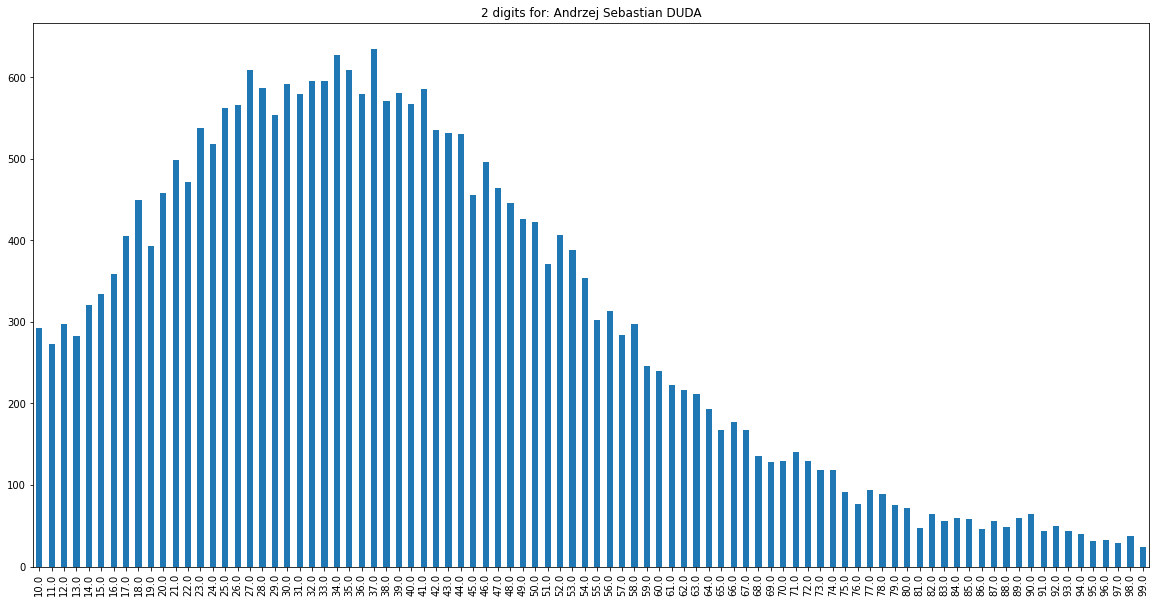

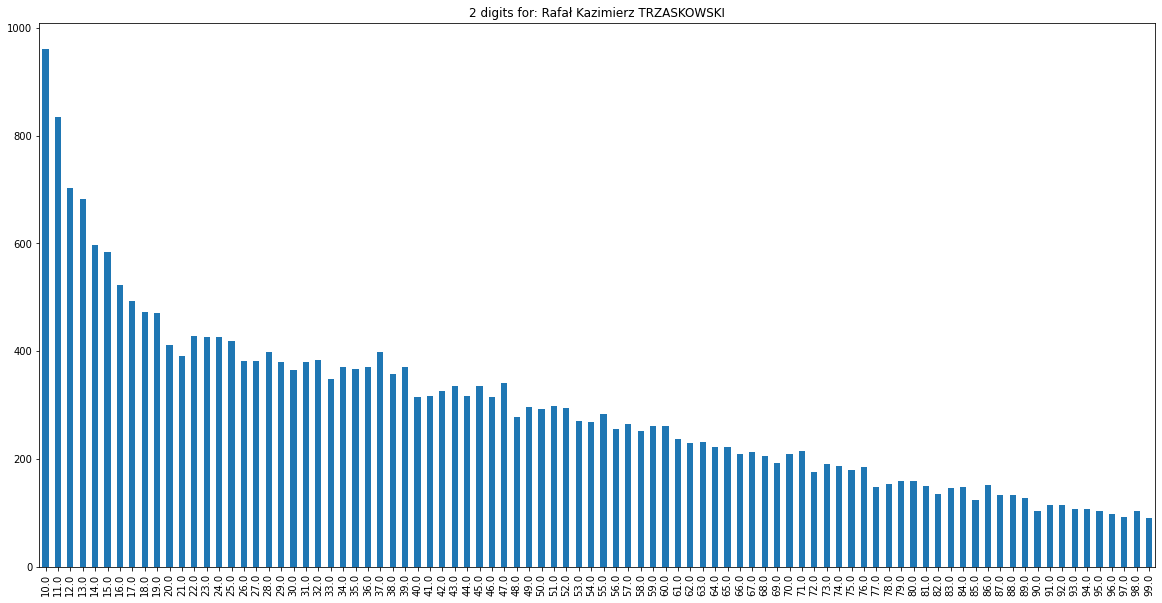

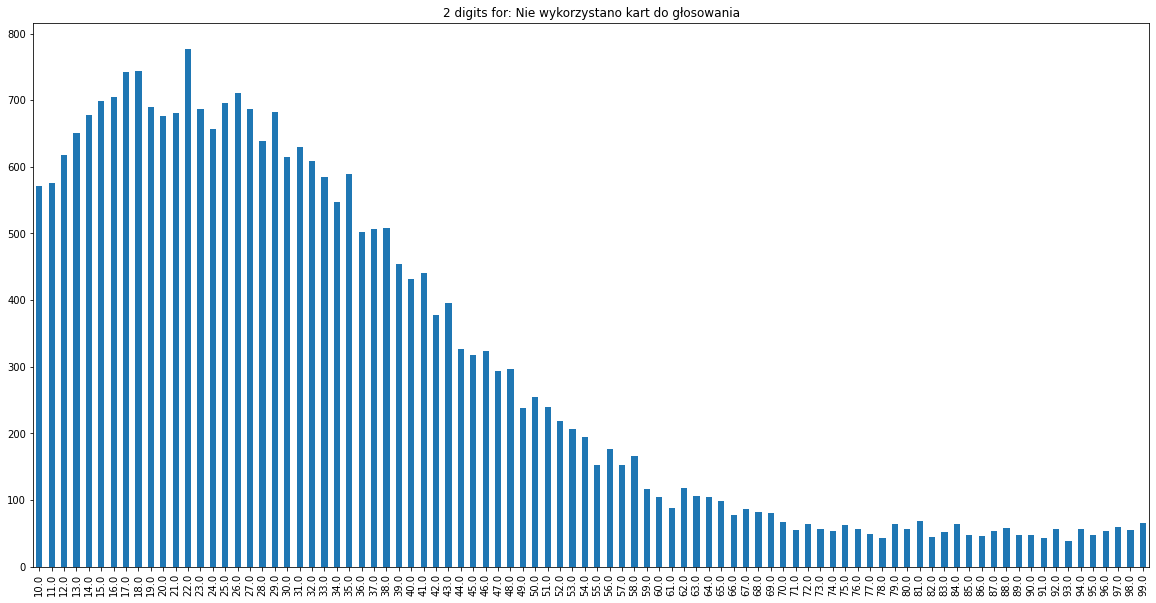

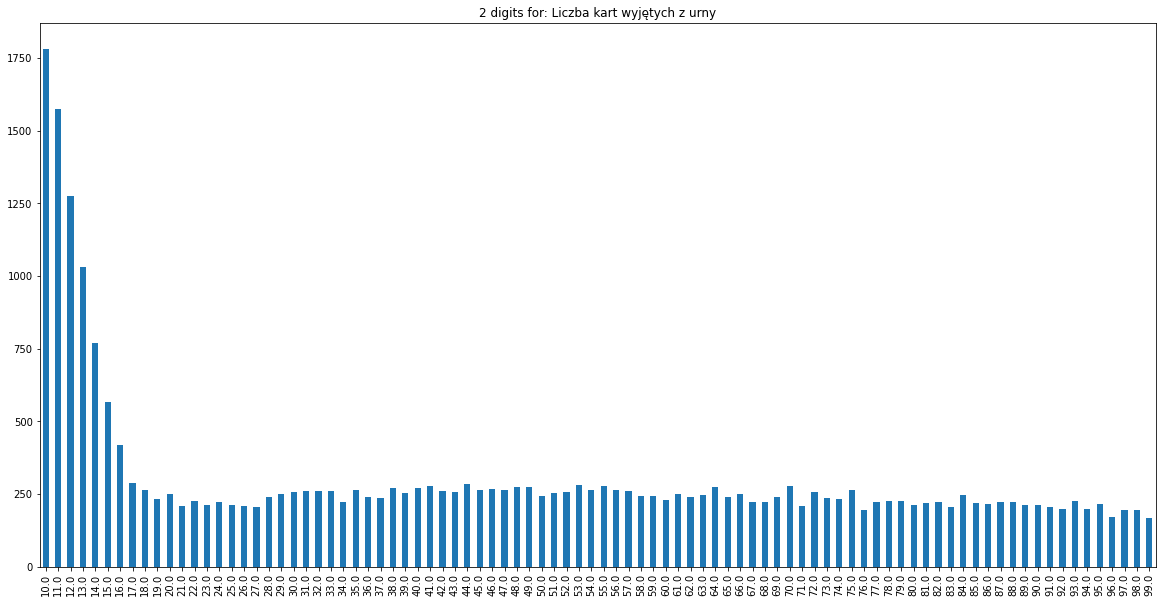

In [5]:
plt.rcParams['figure.figsize'] = [20, 10]
for c in [
          'Andrzej Sebastian DUDA',
          'Rafał Kazimierz TRZASKOWSKI',
          'Nie wykorzystano kart do głosowania',
          'Liczba kart wyjętych z urny'
         ]:
    p = df[c].apply(first_digits(2))
    p.value_counts(sort=False).sort_index().plot.bar()
    plt.title("2 digits for: "+c)
    plt.show()

In [6]:
df[df['Liczba kart wyjętych z urny'].apply(first_digits(2)) == 10]

,Symbol kontrolny,Nr OKW,Kod TERYT,Typ gminy,Numer obwodu,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,...,W tym liczba kart wyjętych z kopert na kartę do głosowania,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
13,b576-ae0f-1937-bf27-e9ca-414f-af6e-dbf5,2.0,20101.0,gmina miejska,14,miasto,stały,"Szkoła Podstawowa Nr 4, ul. Bielska 5, 59-700 ...",m. Bolesławiec,bolesławiecki,...,16.0,0.0,1030.0,4.0,3.0,1.0,NaN,1026.0,404.0,622.0
18,41c5-68b1-8ffc-92a7-0eb5-c67e-67dd-7c9f,2.0,20101.0,gmina miejska,19,miasto,stały,"Miejskie Przedszkole Publiczne Nr 2, ul. Mikoł...",m. Bolesławiec,bolesławiecki,...,13.0,0.0,1020.0,8.0,8.0,0.0,NaN,1012.0,341.0,671.0
19,fa3f-680e-f77c-510d-4d3d-d355-8db9-b15a,2.0,20101.0,gmina miejska,20,miasto,stały,"Miejskie Przedszkole Publiczne Nr 7, ul. Górne...",m. Bolesławiec,bolesławiecki,...,8.0,0.0,1026.0,13.0,8.0,5.0,NaN,1013.0,399.0,614.0
31,3b53-548f-9dba-aeff-be8b-d17e-f277-26e4,2.0,20102.0,gmina wiejska,9,wieś,stały,"Centrum Administracyjno-Kulturalne, Kruszyn ul...",gm. Bolesławiec,bolesławiecki,...,3.0,0.0,1014.0,9.0,6.0,3.0,NaN,1005.0,399.0,606.0
34,667a-8e9f-91ff-d76c-4c2a-f872-6738-44b0,2.0,20103.0,gmina wiejska,1,wieś,stały,"Szkoła Podstawowa w Gromadce, ul. gen. Wł. Sik...",gm. Gromadka,bolesławiecki,...,8.0,0.0,1098.0,12.0,8.0,4.0,NaN,1086.0,615.0,471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27193,c24a-7b21-a062-6347-dde7-6324-5651-3af4,48.0,326201.0,gmina miejska,201,miasto,dom pomocy społecznej,"Dom Pomocy Społecznej ""Dom Kombatanta i Pionie...",m. Szczecin,Szczecin,...,0.0,0.0,100.0,2.0,1.0,1.0,NaN,98.0,87.0,11.0
27204,8bdd-d38f-2451-9e43-325c-041e-f57b-3c94,48.0,326301.0,gmina miejska,5,miasto,stały,"Specjalny Ośrodek Szkolno-Wychowawczy, Piastow...",m. Świnoujście,Świnoujście,...,13.0,0.0,1045.0,7.0,6.0,1.0,NaN,1038.0,336.0,702.0
27205,32e4-767e-4e4c-5924-24d4-a1c8-b38b-6db7,48.0,326301.0,gmina miejska,6,miasto,stały,"Szkoła Podstawowa Nr 4, Szkolna 1, 72-600 Świn...",m. Świnoujście,Świnoujście,...,6.0,0.0,1017.0,9.0,7.0,2.0,NaN,1008.0,304.0,704.0
27206,b4eb-ce6b-320a-bf27-9a15-6011-cbbd-287a,48.0,326301.0,gmina miejska,7,miasto,stały,"Szkoła Podstawowa Nr 4, Szkolna 1, 72-600 Świn...",m. Świnoujście,Świnoujście,...,1.0,0.0,1083.0,6.0,2.0,4.0,NaN,1077.0,330.0,747.0


In [7]:
df[df['Andrzej Sebastian DUDA'].apply(first_digits(2)) == 37]

,Symbol kontrolny,Nr OKW,Kod TERYT,Typ gminy,Numer obwodu,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,...,W tym liczba kart wyjętych z kopert na kartę do głosowania,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
4,0952-9077-3815-3611-6e7c-18b7-b2e5-f2cb,2.0,20101.0,gmina miejska,5,miasto,stały,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",m. Bolesławiec,bolesławiecki,...,6.0,0.0,901.0,7.0,5.0,2.0,NaN,894.0,375.0,519.0
8,6e70-5b0f-33f4-7528-a05b-39a8-4391-e11a,2.0,20101.0,gmina miejska,9,miasto,stały,"Miejskie Przedszkole Publiczne Nr 6, ul. Piotr...",m. Bolesławiec,bolesławiecki,...,18.0,0.0,912.0,5.0,3.0,2.0,NaN,907.0,372.0,535.0
20,e89d-71df-3f06-c46c-2c55-9472-fa96-bd63,2.0,20101.0,gmina miejska,21,miasto,stały,"Miejskie Przedszkole Publiczne Nr 7, ul. Górne...",m. Bolesławiec,bolesławiecki,...,16.0,0.0,938.0,11.0,8.0,3.0,NaN,927.0,379.0,548.0
35,45df-a85f-e845-1861-c890-2f49-59ed-fc5e,2.0,20103.0,gmina wiejska,2,wieś,stały,Gminny Ośrodek Pomocy Społecznej w Gromadce z ...,gm. Gromadka,bolesławiecki,...,0.0,0.0,511.0,3.0,0.0,3.0,NaN,508.0,378.0,130.0
51,82a5-d27b-2932-f564-b2cd-8d46-b862-071b,2.0,20105.0,gmina wiejska,2,wieś,stały,Gminny Ośrodek Sportu i Rekreacji w Osiecznicy...,gm. Osiecznica,bolesławiecki,...,6.0,0.0,808.0,4.0,2.0,2.0,NaN,804.0,372.0,432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27068,9b4b-d251-c615-81da-2ae9-4c59-c99e-e76b,48.0,326201.0,gmina miejska,76,miasto,stały,"Ogólnokształcąca Szkoła Muzyczna I Stopnia, ul...",m. Szczecin,Szczecin,...,2.0,0.0,942.0,8.0,4.0,4.0,NaN,934.0,373.0,561.0
27087,4557-9e62-9b27-cd21-2a27-c2fe-f0bc-4a4c,48.0,326201.0,gmina miejska,95,miasto,stały,"Szkoła Podstawowa Nr 54, ul. Generała Rayskieg...",m. Szczecin,Szczecin,...,13.0,0.0,1023.0,9.0,5.0,4.0,NaN,1014.0,373.0,641.0
27090,e8d1-ae69-436d-b8cd-b708-59a4-c041-5ce8,48.0,326201.0,gmina miejska,98,miasto,stały,"Polskie Towarzystwo Walki z Kalectwem, ul. Wie...",m. Szczecin,Szczecin,...,7.0,0.0,858.0,6.0,3.0,3.0,NaN,852.0,371.0,481.0
27135,a6f8-6f61-0230-2702-2e0b-47ba-2967-fdcd,48.0,326201.0,gmina miejska,143,miasto,stały,Zachodniopomorski Uniwersytet Technologiczny W...,m. Szczecin,Szczecin,...,15.0,1.0,1008.0,10.0,5.0,5.0,NaN,998.0,377.0,621.0


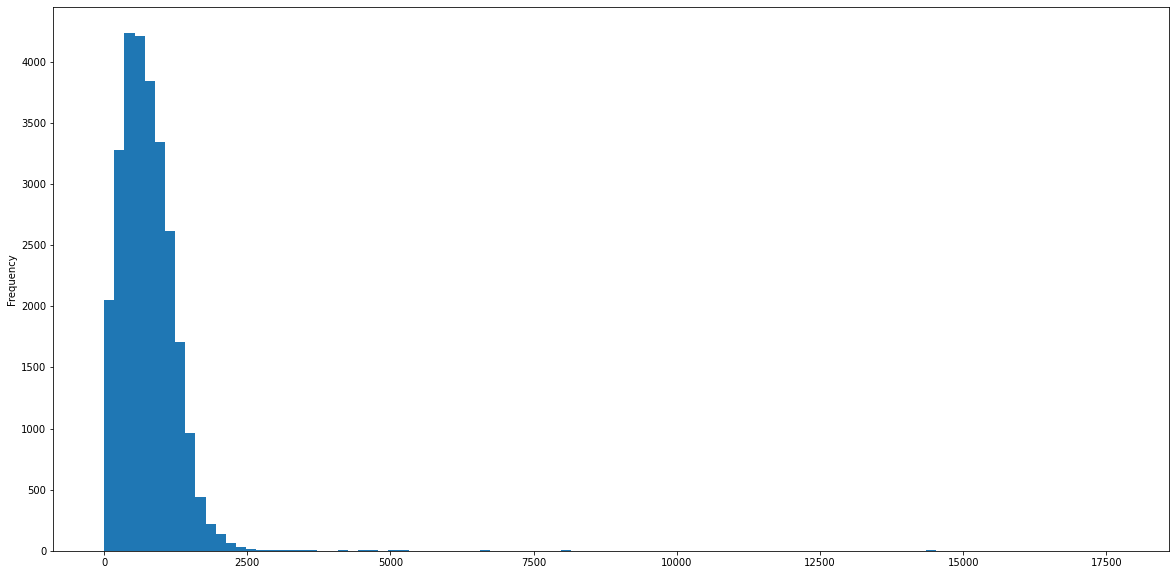

In [12]:
df['Liczba kart wyjętych z urny'].plot.hist(bins=100)

In [13]:
df[df['Liczba kart wyjętych z urny'] > 4000]

,Symbol kontrolny,Nr OKW,Kod TERYT,Typ gminy,Numer obwodu,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,...,W tym liczba kart wyjętych z kopert na kartę do głosowania,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
13898,0811-7a22-404f-3b14-c582-fd9d-55af-02a8,21.0,149901.0,zagranica,57,zagranica,zagranica,"Republika Irlandii, Dublin, Ambasada RP 5 Aile...",zagranica,zagranica,...,7989.0,6.0,7983.0,39.0,20.0,19.0,NaN,7944.0,1859.0,6085.0
13899,3a41-ecf2-3c5b-1f79-1ac9-6e18-3755-a622,21.0,149901.0,zagranica,58,zagranica,zagranica,"Republika Irlandii, Dublin, Rezydencja Ambasad...",zagranica,zagranica,...,8088.0,0.0,8088.0,53.0,24.0,29.0,NaN,8035.0,1803.0,6232.0
13900,55fd-d6b0-0597-e92f-e0e3-ca09-652b-fdc9,21.0,149901.0,zagranica,59,zagranica,zagranica,"Republika Irlandii, Dublin, Wydział Konsularny...",zagranica,zagranica,...,8085.0,15.0,8070.0,42.0,32.0,10.0,NaN,8028.0,1842.0,6186.0
13907,4571-0bfe-0fa2-ace1-731f-3e5c-80cd-b111,21.0,149901.0,zagranica,66,zagranica,zagranica,"Toronto, Konsulat Generalny RP 2603 Lake Shore...",zagranica,zagranica,...,4883.0,0.0,4883.0,19.0,18.0,1.0,NaN,4864.0,3353.0,1511.0
13916,6373-103f-8e32-e935-1e74-9d1b-11b0-d640,21.0,149901.0,zagranica,75,zagranica,zagranica,"Hamburg III, Konsulat Generalny RP Gründgensst...",zagranica,zagranica,...,4076.0,0.0,4076.0,11.0,8.0,3.0,NaN,4065.0,854.0,3211.0
13929,d1cd-2bcf-6493-537f-3e71-70b7-f758-fda0,21.0,149901.0,zagranica,90,zagranica,zagranica,"Haga I, Ambasada RP Alexanderstraat 25 2514 JM...",zagranica,zagranica,...,10484.0,1.0,10484.0,74.0,41.0,33.0,NaN,10410.0,1845.0,8565.0
13930,6b35-448f-64d3-d49a-0610-ca9d-d956-8a2b,21.0,149901.0,zagranica,91,zagranica,zagranica,"Haga II, Ambasada RP (dawny WPHI) Van Lennepwe...",zagranica,zagranica,...,10159.0,1.0,10158.0,56.0,39.0,17.0,NaN,10102.0,1632.0,8470.0
13933,d1f1-56ff-a641-bd40-932c-1e94-35b1-4e12,21.0,149901.0,zagranica,94,zagranica,zagranica,"Hamburg I, Konsulat Generalny RP Gründgensstra...",zagranica,zagranica,...,4167.0,0.0,4167.0,16.0,6.0,10.0,NaN,4151.0,962.0,3189.0
13934,cc4e-4439-ecbb-a77d-553f-d167-606d-60d6,21.0,149901.0,zagranica,95,zagranica,zagranica,"Hamburg II, Konsulat Generalny RP Gründgensstr...",zagranica,zagranica,...,4014.0,2.0,4012.0,17.0,9.0,8.0,NaN,3995.0,988.0,3007.0
13935,190d-ed1b-6f61-dfd8-7ddb-43e6-c631-500f,21.0,149901.0,zagranica,96,zagranica,zagranica,"Kolonia I, Konsulat Generalny RP Im Media Park...",zagranica,zagranica,...,5148.0,10.0,5138.0,14.0,12.0,2.0,NaN,5124.0,1315.0,3809.0


In [16]:
df[df['Andrzej Sebastian DUDA']/df['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']*100 > 80]

,Symbol kontrolny,Nr OKW,Kod TERYT,Typ gminy,Numer obwodu,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,...,W tym liczba kart wyjętych z kopert na kartę do głosowania,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
84,4a0e-cde3-5f9e-9f4a-52fc-96f1-ea57-4616,4.0,20201.0,gmina miejska,22,miasto,dom pomocy społecznej,"Dom Pomocy Społecznej, Stefana Żeromskiego 2, ...",m. Bielawa,dzierżoniowski,...,0.0,0.0,18.0,1.0,0.0,1.0,NaN,17.0,16.0,1.0
116,8b19-0b32-a4ff-1a7a-1d58-6f06-5c78-8326,4.0,20203.0,gmina miejsko-wiejska,9,miasto,dom pomocy społecznej,"Dom Pomocy Społecznej ""Zielone Wzgórza"" (budyn...",m. Pieszyce,dzierżoniowski,...,0.0,0.0,44.0,2.0,0.0,2.0,NaN,42.0,34.0,8.0
145,edb0-35bd-7fa4-1974-6d72-fa85-8259-fb22,4.0,20207.0,gmina miejsko-wiejska,7,miasto i wieś,dom pomocy społecznej,"Dom Pomocy Społecznej-filia w Niemczy, ul. Kol...",gm. Niemcza,dzierżoniowski,...,0.0,0.0,33.0,2.0,0.0,2.0,NaN,31.0,27.0,4.0
180,d5f8-754f-3b4e-0ba0-2076-412e-fcd7-6e25,3.0,20301.0,gmina miejska,35,miasto,dom pomocy społecznej,"Dom Pomocy Społecznej ""Magnolia"" w Głogowie, u...",m. Głogów,głogowski,...,0.0,0.0,66.0,4.0,0.0,4.0,NaN,62.0,56.0,6.0
196,1e69-cc5a-152a-d32c-a9c2-287c-ee61-6408,3.0,20305.0,gmina wiejska,2,wieś,stały,"Świetlica Wiejska, Piersna 26, 67-221 Białołęka",gm. Pęcław,głogowski,...,2.0,0.0,414.0,4.0,0.0,4.0,NaN,410.0,333.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26663,af2c-8770-898b-cc38-93a1-5792-e6a4-1f17,48.0,321205.0,gmina miejsko-wiejska,13,miasto,zakład leczniczy,Szpital Powiatowy w Pyrzycach-sala konferencyj...,gm. Pyrzyce,pyrzycki,...,0.0,0.0,17.0,1.0,0.0,1.0,NaN,16.0,15.0,1.0
26759,d708-38ae-35f7-e147-3919-e442-2861-07e1,48.0,321404.0,gmina wiejska,7,wieś,dom pomocy społecznej,"Domu Pomocy Społecznej w Dolicach, ul. Wiśniow...",gm. Dolice,stargardzki,...,0.0,0.0,28.0,1.0,0.0,1.0,NaN,27.0,23.0,4.0
26856,fdad-6489-15e4-8088-48ba-e2c3-2294-b5be,49.0,321603.0,gmina miejsko-wiejska,10,miasto,zakład leczniczy,"Przyjazny Szpital w Połczynie-Zdroju, Szpitaln...",gm. Połczyn-Zdrój,świdwiński,...,0.0,0.0,8.0,0.0,0.0,0.0,NaN,8.0,7.0,1.0
27186,ef04-5672-2879-4aa4-7dcd-399f-d3fc-025d,48.0,326201.0,gmina miejska,194,miasto,dom pomocy społecznej,"Dom Pomocy Społecznej, ul. Broniewskiego 4/6, ...",m. Szczecin,Szczecin,...,0.0,0.0,22.0,3.0,1.0,2.0,NaN,19.0,16.0,3.0


In [17]:
df.groupby(['Typ obwodu']).sum()

,Nr OKW,Kod TERYT,Numer obwodu,Komisje obwodowe otrzymały kart do głosowania,Liczba wyborców uprawnionych do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania,"Liczba wyborców, którym wysłano pakiety wyborcze",...,W tym liczba kart wyjętych z kopert na kartę do głosowania,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI
Typ obwodu,,,,,,,,,,,,,,,,,,,,,
areszt śledczy,1221.0,8.108891e+06,7392,22033.0,20607.0,6912.0,15121.0,0.0,27.0,0.0,...,0.0,0.0,15116.0,263.0,65.0,198.0,0.0,14853.0,4160.0,10693.0
dom pomocy społecznej,17003.0,1.116130e+08,42089,55265.0,46547.0,26860.0,28405.0,0.0,122.0,0.0,...,0.0,0.0,28404.0,970.0,251.0,719.0,0.0,27434.0,21824.0,5610.0
dom studencki,18.0,1.261010e+05,421,314.0,175.0,192.0,122.0,0.0,0.0,0.0,...,0.0,0.0,122.0,3.0,3.0,0.0,0.0,119.0,31.0,88.0
oddział zewnętrzny aresztu śledczego,585.0,3.863878e+06,1795,2417.0,2014.0,799.0,1618.0,0.0,0.0,0.0,...,0.0,0.0,1618.0,25.0,6.0,19.0,0.0,1593.0,606.0,987.0
oddział zewnętrzny zakładu karnego,441.0,2.803762e+06,213,2293.0,1866.0,862.0,1431.0,0.0,2.0,0.0,...,0.0,0.0,1431.0,17.0,6.0,11.0,0.0,1414.0,619.0,795.0
statek,168.0,1.198408e+06,8028,425.0,384.0,42.0,383.0,0.0,78.0,0.0,...,0.0,0.0,383.0,23.0,14.0,9.0,0.0,360.0,110.0,250.0
stały,647083.0,4.223839e+09,885698,27158257.0,29506994.0,7271691.0,19887393.0,21210.0,576497.0,223849.0,...,209299.0,1453.0,20093587.0,173275.0,100578.0,72697.0,0.0,19920312.0,10266723.0,9653589.0
zagranica,3507.0,2.503347e+07,14706,83345.0,524884.0,18745.0,34692.0,0.0,4749.0,480262.0,...,383723.0,816.0,417598.0,2078.0,1237.0,841.0,0.0,415520.0,107387.0,308133.0
zakład karny,2446.0,1.595035e+07,4393,51590.0,46181.0,20900.0,30690.0,0.0,13.0,0.0,...,0.0,0.0,30688.0,489.0,101.0,388.0,0.0,30199.0,10280.0,19919.0
